# **Advertisement Success Prediction**

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Reading the Data

In [2]:
df = pd.read_csv('./DataSets/advertising.csv')
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


# Understanding the Data

In [3]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [4]:
df.shape

(1000, 10)

In [5]:
df.size

10000

In [6]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [7]:
df.max()

Daily Time Spent on Site                           91.43
Age                                                   61
Area Income                                      79484.8
Daily Internet Usage                              269.96
Ad Topic Line               Visionary reciprocal circuit
City                                          Zacharyton
Male                                                   1
Country                                         Zimbabwe
Timestamp                            2016-07-24 00:22:16
Clicked on Ad                                          1
dtype: object

In [8]:
df.min()

Daily Time Spent on Site                                 32.6
Age                                                        19
Area Income                                           13996.5
Daily Internet Usage                                   104.78
Ad Topic Line               Adaptive 24hour Graphic Interface
City                                                Adamsbury
Male                                                        0
Country                                           Afghanistan
Timestamp                                 2016-01-01 02:52:10
Clicked on Ad                                               0
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [10]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [11]:
df.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


In [12]:
df.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

In [13]:
df.isnull().any()

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Ad Topic Line               False
City                        False
Male                        False
Country                     False
Timestamp                   False
Clicked on Ad               False
dtype: bool

# Exploratory Data Analysis / Visualization

<AxesSubplot:>

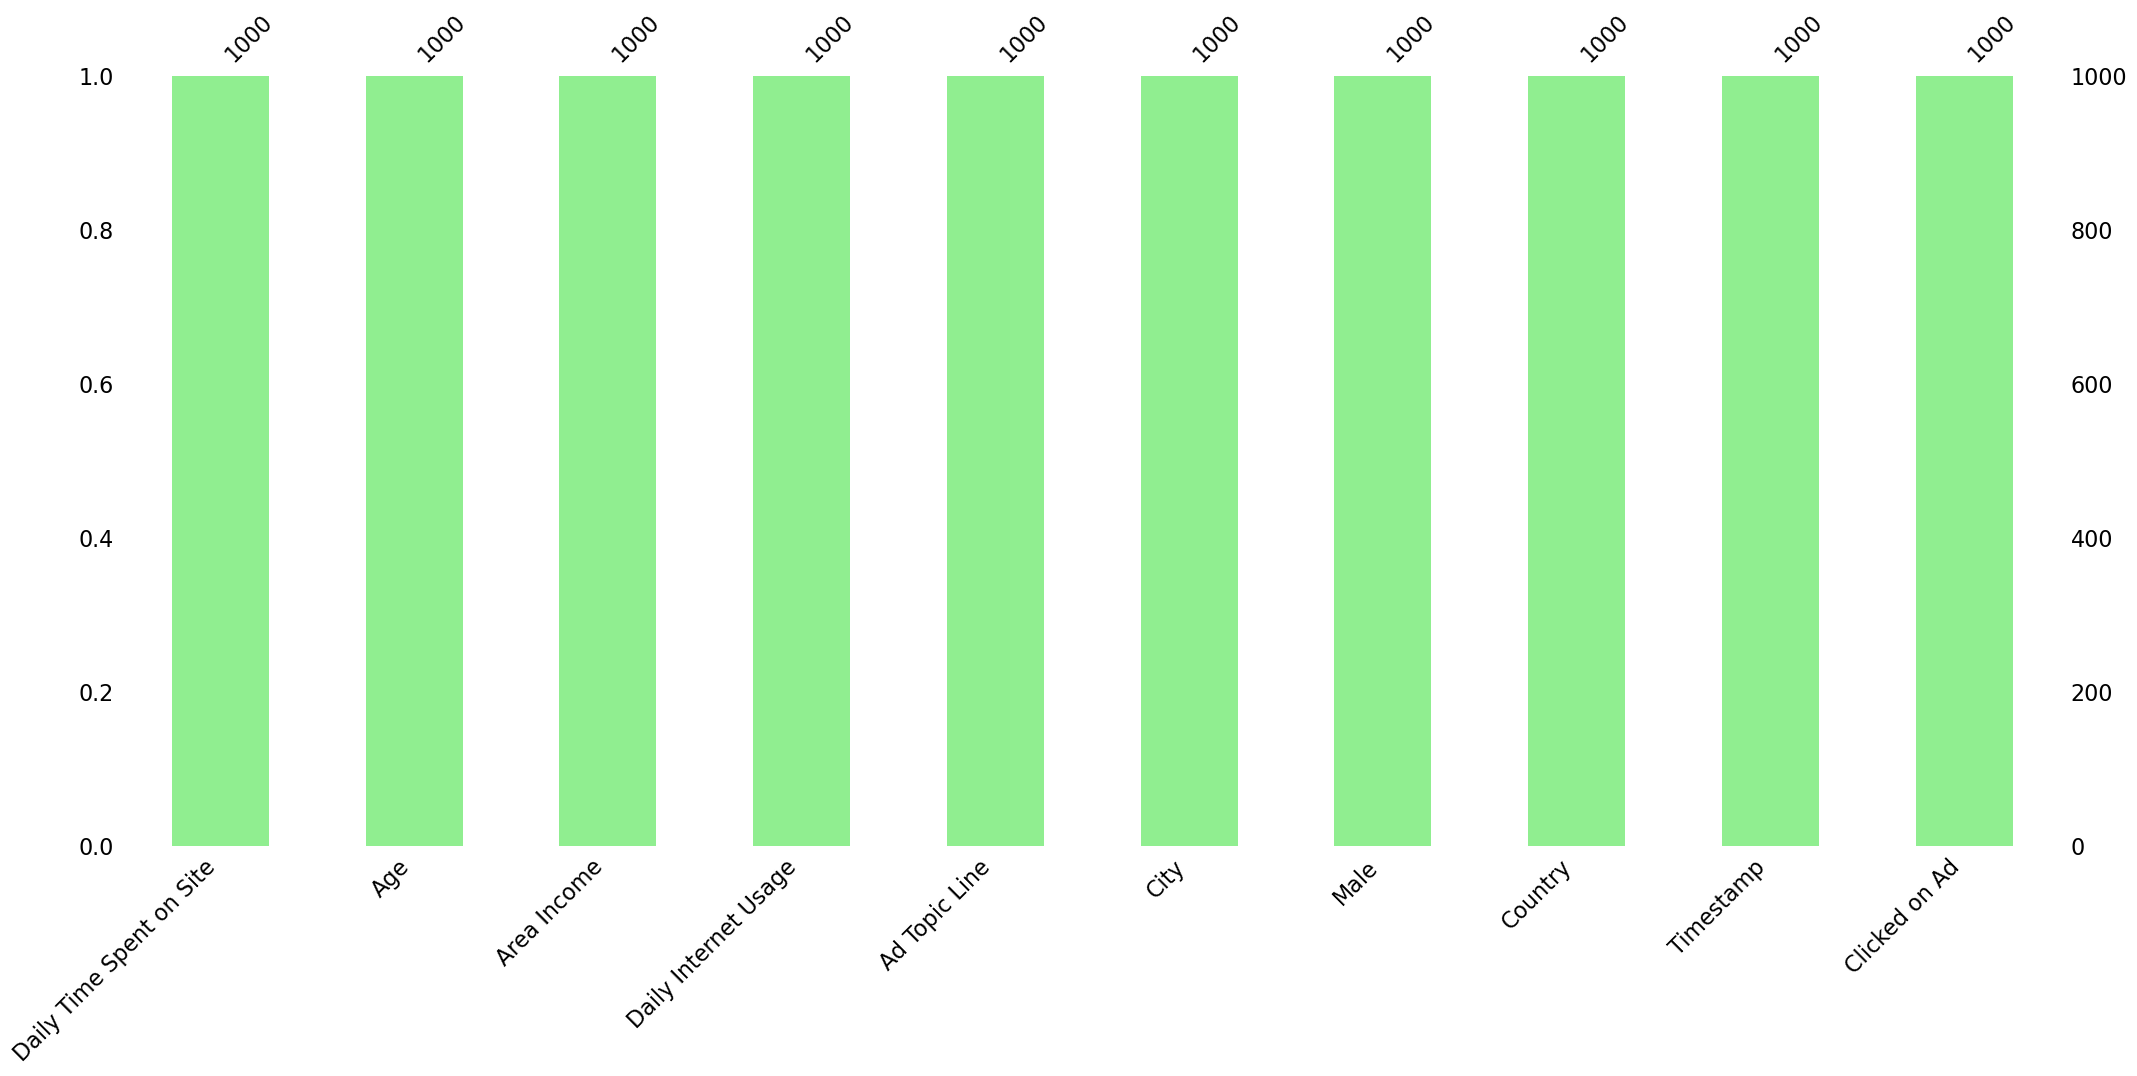

In [14]:
import missingno as no
no.bar(df, color='lightgreen')

<AxesSubplot:>

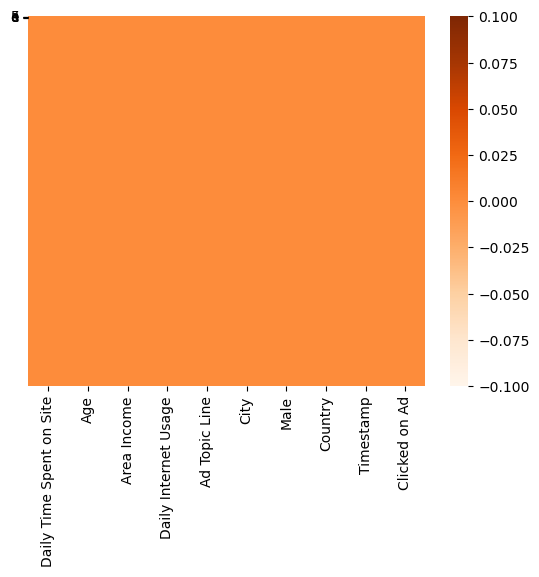

In [15]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='Oranges')

In [16]:
df.Male.value_counts()

0    519
1    481
Name: Male, dtype: int64

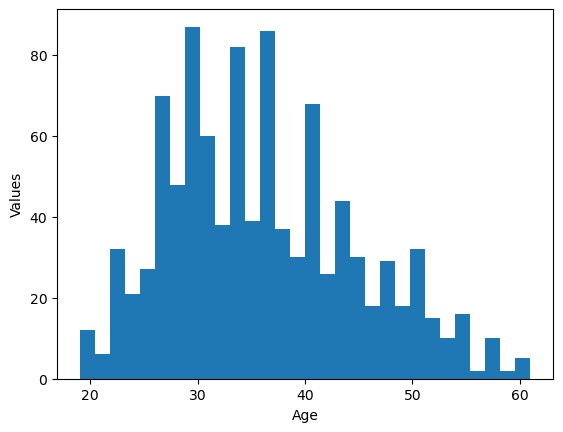

In [17]:
plt.hist(df['Age'],bins = 30)
plt.xlabel('Age')
plt.ylabel('Values')
plt.show()

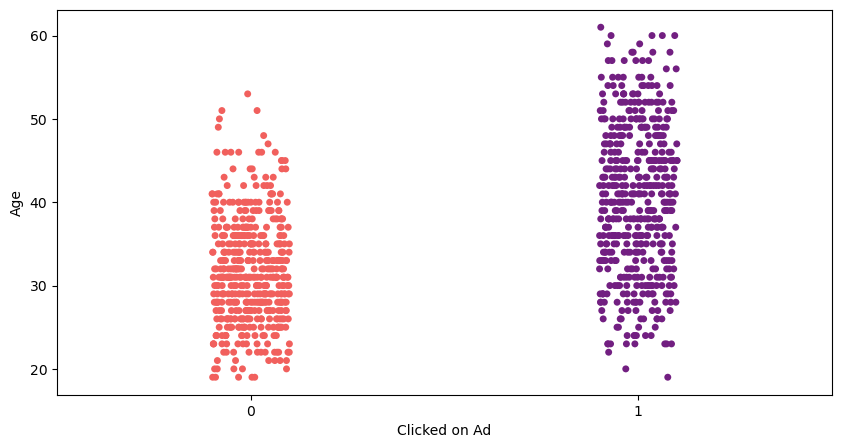

In [18]:
plt.figure(figsize=(10,5))
sns.stripplot(x=df['Clicked on Ad'], y=df['Age'], palette='magma_r')
plt.show()

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Age'>

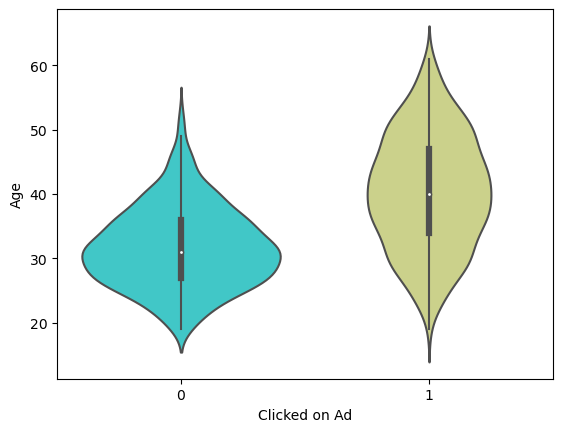

In [19]:
sns.violinplot(x=df['Clicked on Ad'], y=df.Age, palette='rainbow')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Daily Internet Usage'>

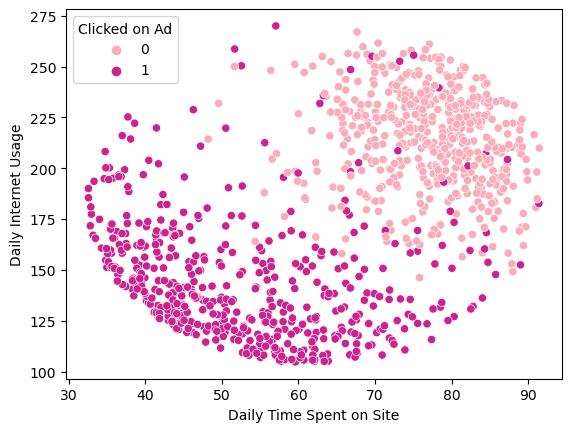

In [20]:
sns.scatterplot(df['Daily Time Spent on Site'], df['Daily Internet Usage'], hue=df['Clicked on Ad'], data=df, palette='RdPu')

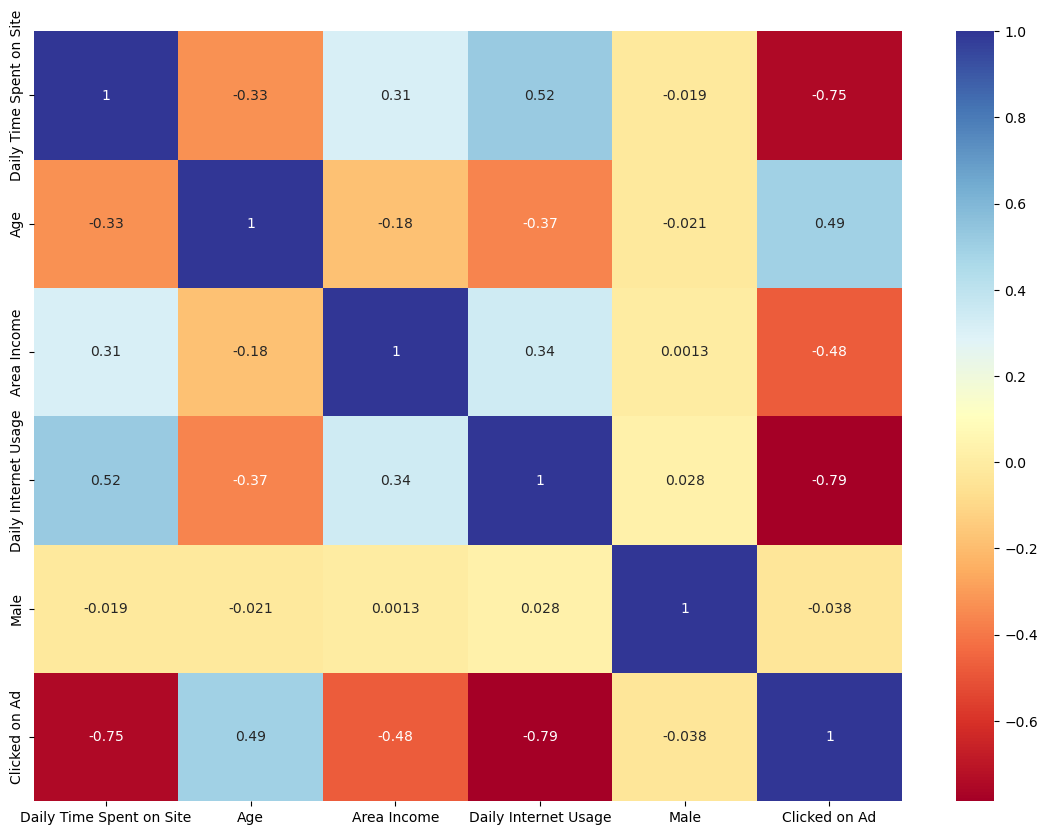

In [21]:
plt.figure(figsize=(14,10))
hm = sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Clicked on Ad', ylabel='Daily Internet Usage'>

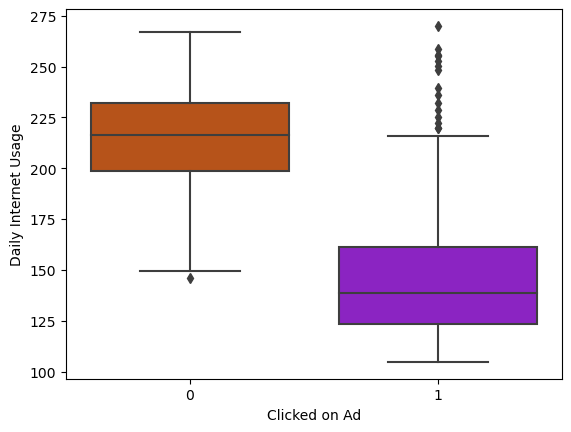

In [22]:
sns.boxplot(df['Clicked on Ad'], df['Daily Internet Usage'], data=df, palette='gnuplot_r')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


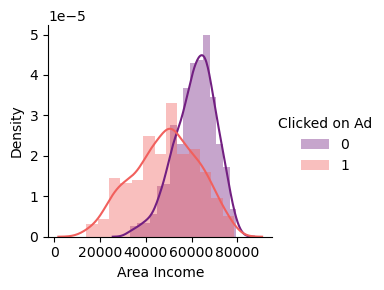

In [23]:
sns.FacetGrid(df, hue='Clicked on Ad', palette='magma').map(sns.distplot, 'Area Income').add_legend()

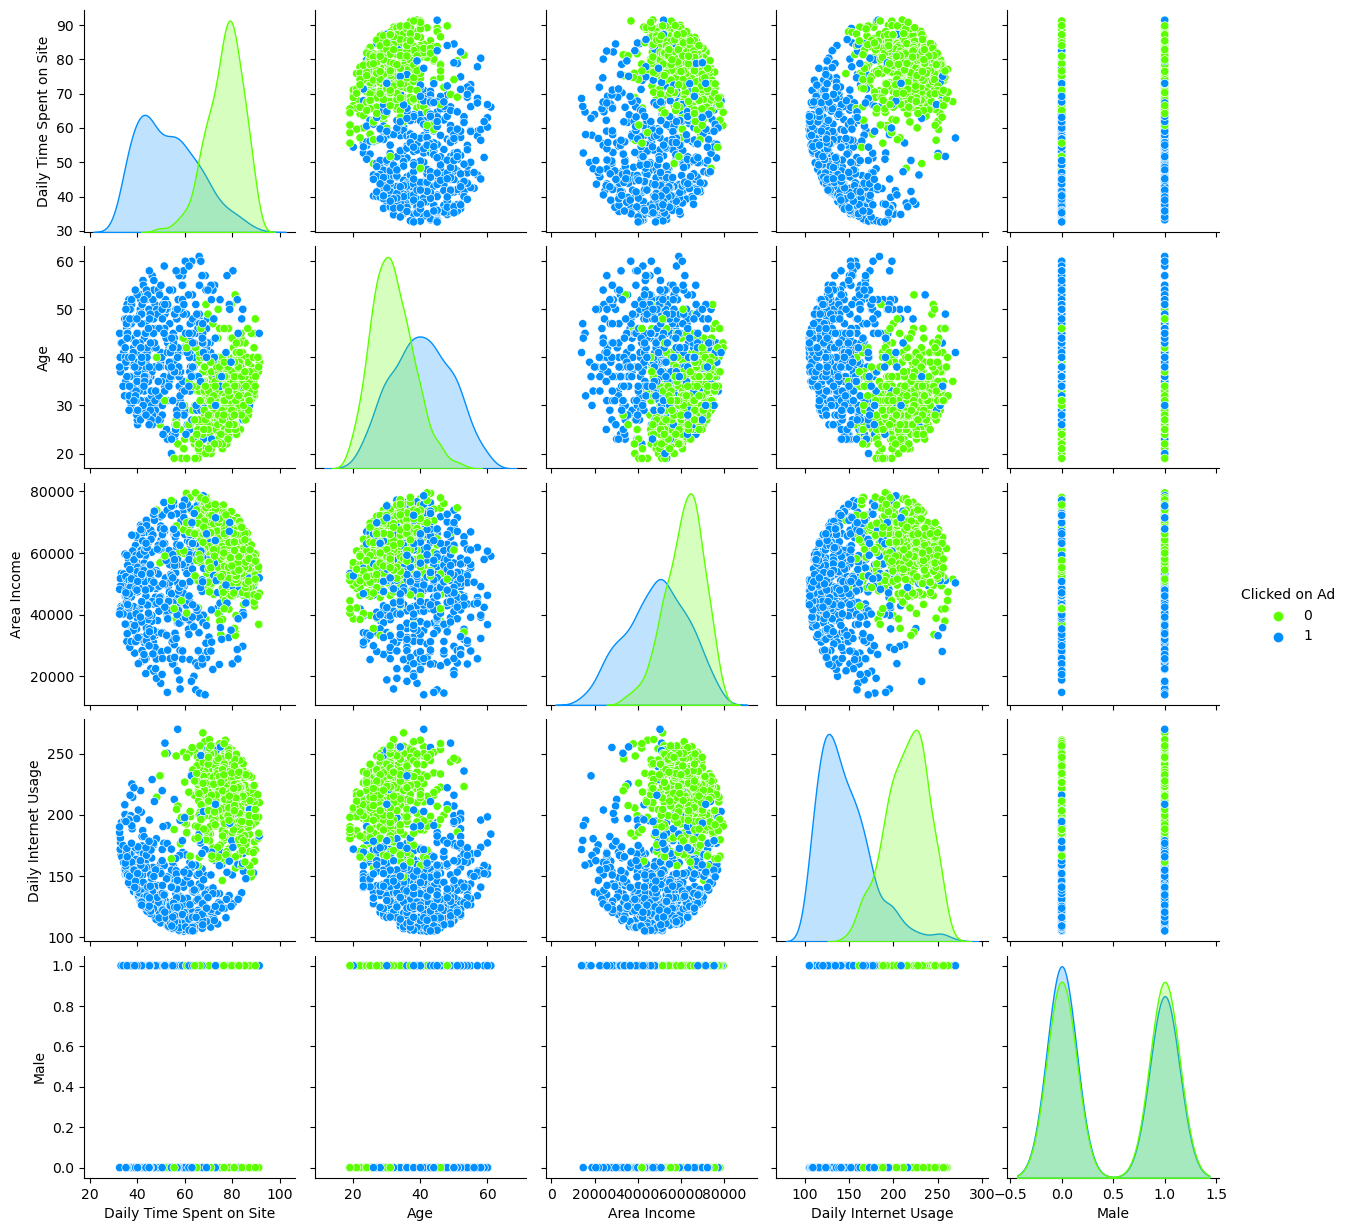

In [24]:
sns.pairplot(df,hue='Clicked on Ad',palette='gist_rainbow')

# Training and Testing the Data

In [25]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [26]:
# Make a helper function for plotting confusion matrix, and compute train and test accuracies
def make_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="OrRd" ,fmt='g')
    train_accuracy = round( accuracy_score(y_train, y_pred_train)*100,2)
    test_accuracy  = round( accuracy_score(y_test, y_pred_test)*100,2)
    print("train Accuracy : ", train_accuracy)
    print("Test Accuracy : ",  test_accuracy)
    return test_accuracy
                          

# Logistic Regression

train Accuracy :  89.33
Test Accuracy :  90.8


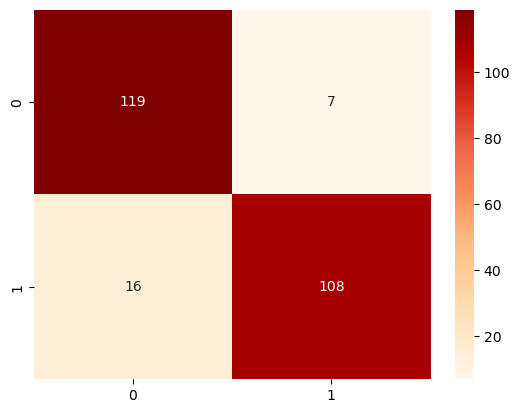

In [27]:
lm = LogisticRegression(random_state=36)
ac1 = make_model(lm, X_train, X_test, y_train, y_test)

# Support Vector Machine

train Accuracy :  71.73
Test Accuracy :  70.0


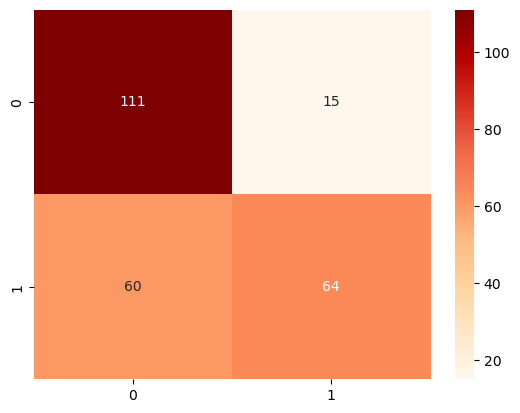

In [28]:
svc = SVC(C=10)
ac2 = make_model(svc, X_train, X_test, y_train, y_test)

# K Nearest Neighbor

train Accuracy :  100.0
Test Accuracy :  76.4


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

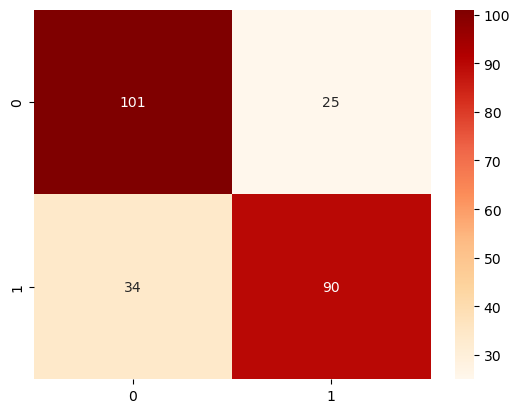

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)
ac3 = make_model(knn, X_train, X_test, y_train, y_test)

# Decission Tree

train Accuracy :  100.0
Test Accuracy :  93.6


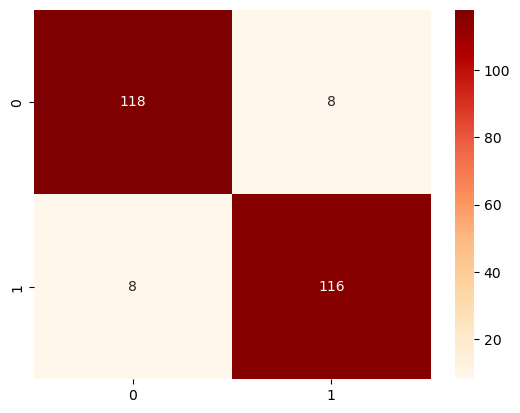

In [30]:
dt = DecisionTreeClassifier(random_state=42)
ac4 = make_model(dt, X_train, X_test, y_train, y_test)

# Random Forest 

train Accuracy :  100.0
Test Accuracy :  94.8


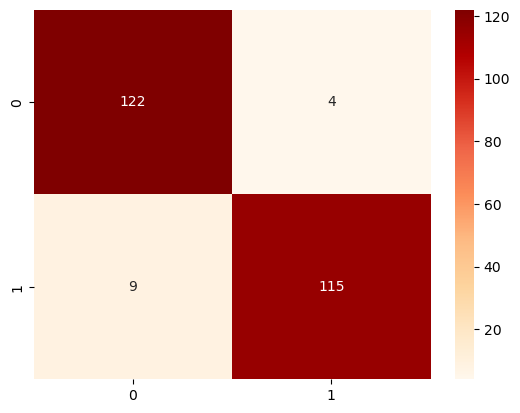

In [31]:
rf = RandomForestClassifier(random_state=42)
ac5 = make_model(rf, X_train, X_test, y_train, y_test)

# GaussianNB

train Accuracy :  97.07
Test Accuracy :  96.0


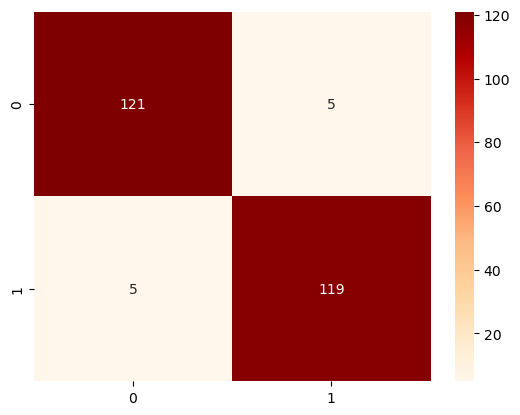

In [32]:
from sklearn.naive_bayes import GaussianNB
gaus = GaussianNB()
ac6 = make_model(gaus, X_train, X_test, y_train, y_test)

# Neuralnetwork

train Accuracy :  49.87
Test Accuracy :  50.4


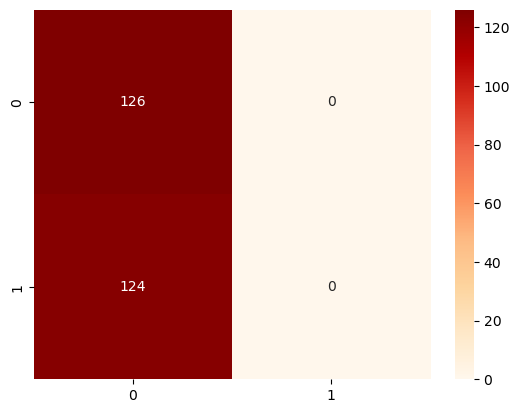

In [34]:
dnn   = MLPClassifier(alpha=1, max_iter=1000)
ac7 = make_model(dnn, X_train, X_test, y_train, y_test)

# GradientBoosting

train Accuracy :  99.87
Test Accuracy :  95.6


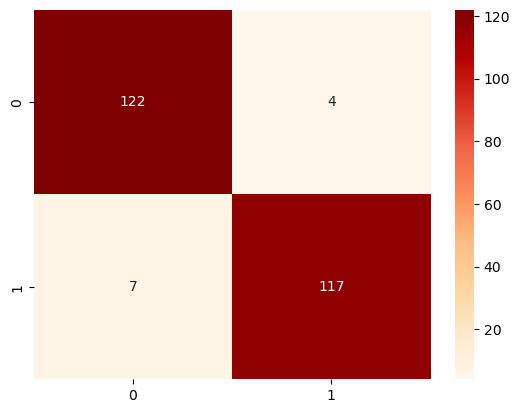

In [35]:
gbc   = GradientBoostingClassifier() 
ac8 = make_model(gbc, X_train, X_test, y_train, y_test)


# AdaBoostClassifier

train Accuracy :  98.67
Test Accuracy :  94.0


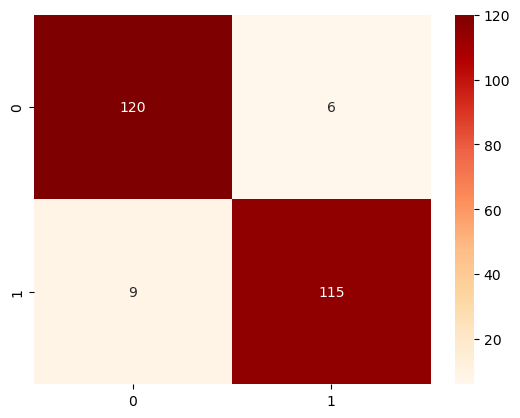

In [36]:
ada   = AdaBoostClassifier()
ac9 = make_model(ada, X_train, X_test, y_train, y_test)

# Comparing Accuracy of Different Models

In [37]:
accuracy =  {ac1: 'Logistic Regression', ac2: 'SVM', ac3:'KNN', 
             ac4:'Decission Tree', ac5: 'Random Forest',
             ac6:'Gaussian', ac7: 'Neuralnetwork',
             ac8:'GradientBoost', ac9: 'AdaBoost',
            }

<AxesSubplot:>

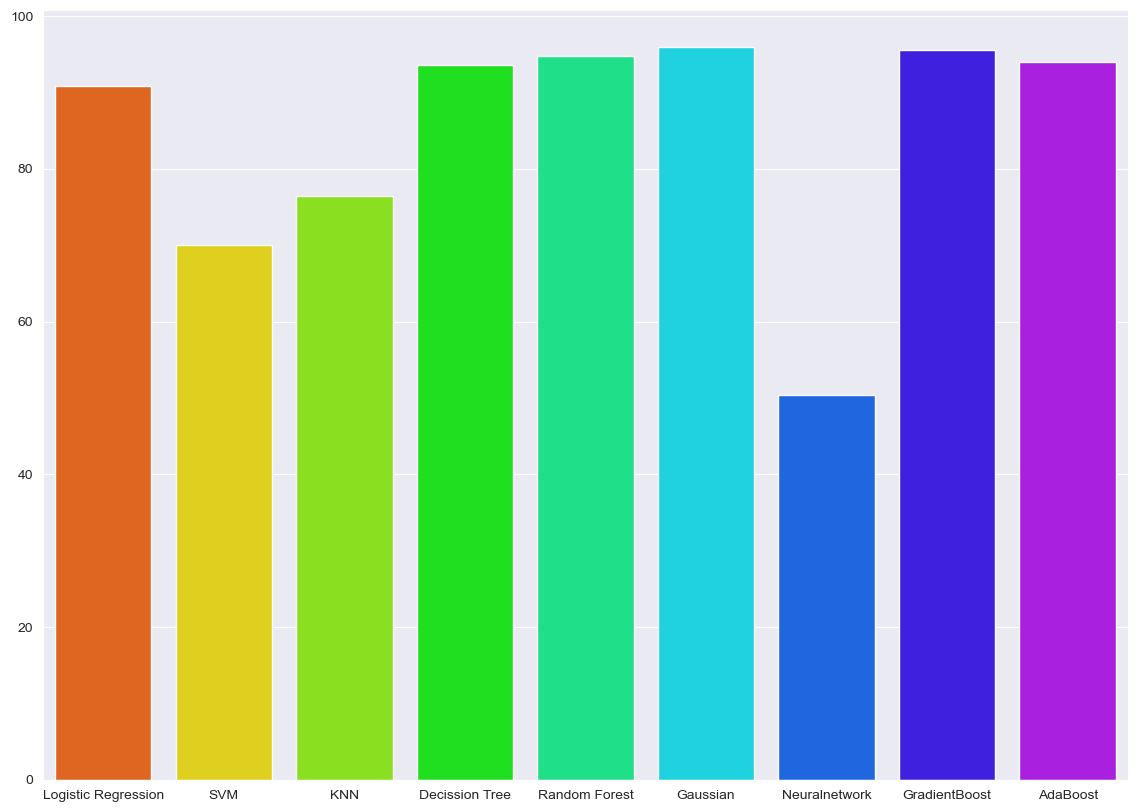

In [38]:
sns.set_style('darkgrid')
plt.figure(figsize=(14, 10))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow')